In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ParisHousingClass.csv')

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import math

In [ ]:
#support vector regression model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
# handle missing value
df.isnull().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [ ]:
df=df.drop('cityCode',axis=1)

In [ ]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64
hasStormProtector,int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder and transform the 'category' column
df['category_encoded'] = le.fit_transform(df['category'])

# Print the original classes recognized by the encoder
print("Original categories:", le.classes_)

# Print each original category and its corresponding encoded value
for class_index, class_label in enumerate(le.classes_):
    print(f"Encoded value {class_index}: Original value '{class_label}'")

Original categories: ['Basic' 'Luxury']
Encoded value 0: Original value 'Basic'
Encoded value 1: Original value 'Luxury'


In [ ]:
df=df.drop('category',axis=1)

In [ ]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64
hasStormProtector,int64


In [ ]:
#outliner
replace_outliner= df.copy()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #Interquartile Range

#find outliner
outliners=((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

In [ ]:
# replace outliner with median
for col in replace_outliner.columns:
  median=replace_outliner[col].median()
  replace_outliner[col][outliners[col]]=median

<ipython-input-52-b69a349a59cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_outliner[col][outliners[col]]=median
<ipython-input-52-b69a349a59cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_outliner[col][outliners[col]]=median
<ipython-input-52-b69a349a59cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replace_outliner[col][outliners[col]]=median
<ipython-input-52-b69a349a59cd>:4: SettingWithCopyWarning: 
A

In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category_encoded'],
      dtype='object')

In [ ]:
df.shape

(10000, 17)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.dtypes

,0
squareMeters,int64
numberOfRooms,int64
hasYard,int64
hasPool,int64
floors,int64
cityPartRange,int64
numPrevOwners,int64
made,int64
isNewBuilt,int64
hasStormProtector,int64


In [ ]:
# set y axis as price, and the other feature as x
X=df.drop('category_encoded',axis=1)
y=df['category_encoded']

In [ ]:
# split training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature selection
numerical_features=df[['squareMeters','numberOfRooms','floors','numPrevOwners','made','basement','attic','garage','hasGuestRoom','price']]

<Axes: >

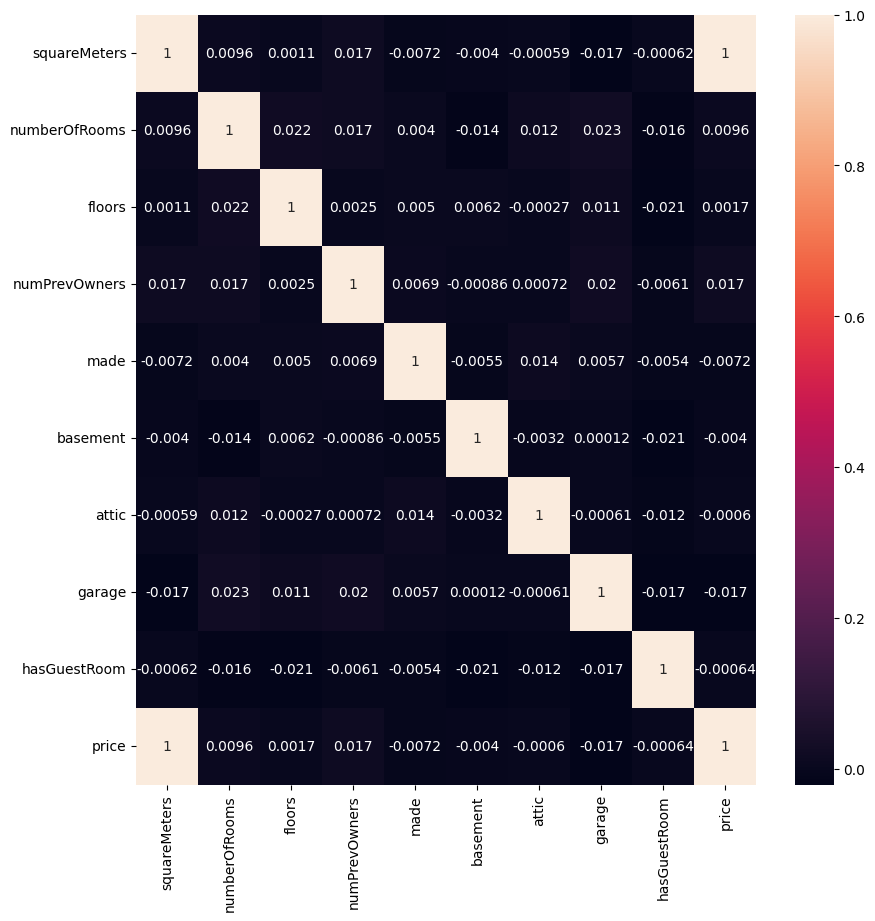

In [ ]:
#numerical feature correlation
numerical_features.corr()
plot=numerical_features.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(plot,annot=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
#scale x_train and x-test
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random search parameters for classification
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, 60, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10, 15],
    'bootstrap': [True, False]
}

# Perform random search with parameters
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_distributions,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Get the best parameters and model performance
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validated accuracy: ", best_score)

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best cross-validated accuracy:  1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#build a classification model using training set
best_rf_classifier = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=15,max_features='log2',max_depth=None,bootstrap=False,random_state=42)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[1744    0]
 [   0  256]]


In [ ]:
# print a classification report for additional metrics like precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the values of k to evaluate
k_values = [3, 5, 7, 10, 12]

# Store results for each k
results = {}

# Loop through each k value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = RandomForestClassifier(random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    # Store the results
    results[k] = {
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy
    }

    print(f"K={k} - Mean Accuracy: {mean_accuracy:.4f}, Std: {std_accuracy:.4f}")




K=3 - Mean Accuracy: 1.0000, Std: 0.0000
K=5 - Mean Accuracy: 1.0000, Std: 0.0000
K=7 - Mean Accuracy: 1.0000, Std: 0.0000
K=10 - Mean Accuracy: 1.0000, Std: 0.0000
K=12 - Mean Accuracy: 1.0000, Std: 0.0000


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Use 'accuracy' or another metric
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Standard Deviation of Accuracy: {np.std(scores)}")



Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation of Accuracy: 0.0


In [ ]:
# 评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Testing MSE: {mse}")
print(f"Testing R2 Score: {r2}")

Testing MSE: 0.0
Testing R2 Score: 1.0


In [ ]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category_encoded'],
      dtype='object')

In [ ]:
import pandas as pd

In [ ]:
#new customer property information:
new_property= {'squareMeters':1000,'numberOfRooms':4,'hasYard':1,'hasPool':1,'floors':50,'cityPartRange':4,'numPrevOwners':3,'made':2005,'isNewBuilt':0,'hasStormProtector':0,'basement':0,'attic':0,'garage':1,'hasStorageRoom':0,'hasGuestRoom':0,'price':3000000}

In [ ]:

# Convert the new property dictionary to a DataFrame
new_property_df = pd.DataFrame([new_property])


# Scale the new property data using the same scaler used for training data
scaled_new_property = scaler.transform(new_property_df)

# Predict the category using the trained model
predicted_category = best_rf_classifier.predict(scaled_new_property)

# Output the predicted category
print(f"The predicted category for the new property is: {predicted_category[0]}")

The predicted category for the new property is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
importances = best_rf_classifier.feature_importances_
feature_names = X.columns

# Pair feature names with their importance scores
features_importances = list(zip(feature_names, importances))

# Sort the feature importances in descending order
sorted_importances = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Output the sorted feature importances
for feature, importance in sorted_importances:
    print(f"{feature}: {importance:.4f}")

hasYard: 0.3442
isNewBuilt: 0.3154
hasPool: 0.3121
attic: 0.0037
numberOfRooms: 0.0036
floors: 0.0034
basement: 0.0033
garage: 0.0027
squareMeters: 0.0027
price: 0.0027
made: 0.0020
numPrevOwners: 0.0015
hasGuestRoom: 0.0011
cityPartRange: 0.0010
hasStorageRoom: 0.0003
hasStormProtector: 0.0002
